<a href="https://colab.research.google.com/github/Prado1bernardo/Projetos_data_science/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic: Machine learning from disaster**

O desafio do Titanic é uma das competições mais famosas, e é promovida pelo site https://www.kaggle.com/. A tamanha popularidade desta competição a tornou um 'Hello, World!' no universo fantástico do Data Science.

Mesmo depois de 113 anos, o naufrágio do Titanic ainda é lembrado como um dos mais infames da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o RMS Titanic, amplamente considerado "inafundável", afundou após colidir com um iceberg. Infelizmente, não havia botes salva|vidas suficientes para todos a bordo, resultando na morte de 1.502 dos 2.224 passageiros e tripulantes.

Embora houvesse um elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas tinham maior probabilidade de sobreviver do que outros.

Com os dados reais disponibilizados, agora podemos fazer uma análise exploratória, testar hipóteses e até mesmo construir um modelo preditivo.


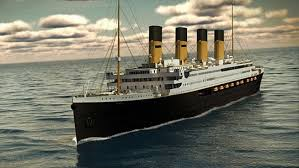

## Checklist

Definição do Problema

Obtenção dos Dados

Exploração dos Dados

Preparação dos Dados

Construção do Modelo

Avaliação

## Definição do Problema

A construção do Titanic levou cerca de 2 anos e custou 7,5 milhões de dólares (valores da época). Com 269 metros de comprimento, 28 metros de largura e 53 metros de altura, operava com uma tripulação de 892 pessoas e poderia levar até 2435 passageiros (espalhados pelas três classes disponíveis).

Pensado para ser o mais seguro e luxuoso navio da época, foi lançado ao mar em 1911, ganhando fama de ser "inafundável".

A descrição completa da competição, assim como o conjunto de dados, está disponível na página do Kaggle Titanic: Machine Learning from Disaster.

O naufrágio do Titanic teve como fatores contribuintes causas naturais (como o clima) e causas humanas (negligência e excesso de confiança). Independente das causas, o fato é que seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.

Embora aqueles que escaparam com vida tiveram sua boa dose de sorte, alguns grupos de pessoas eram mais propensos a escaparem da morte do que outros. Por exemplo, mulheres, crianças e passageiros da 1ª Classe. Assim, nota-se que existe algum padrão que pode ser extraído dos dados brutos.

### Objetivo
Analisar quais variáveis tiveram maior influência na probabilidade de sobrevivência (ou seja, que tipo de pessoa teve mais chances de escapar com vida).

Após analisar os dados, vamos construir um modelo que dê a previsão de sobrevivência para um passageiro qualquer que seja fornecido como input.

Métrica de Desempenho


O score é calculado em relação ao número de previsões corretas que o modelo fez. Ou seja, é considerada apenas a acurácia do modelo.

## Obtenção dos Dados

Os dados disponibilizados pelo Kaggle foram divididos em dois grupos:

*   Dataset de treino (train.csv)

   Deve ser usado para construir o modelo de Machine Learning. Neste conjunto de dados, é fornecida a informação se o passageiro sobreviveu ou não. Composto por diversas características como gênero do passageiro e classe de embarque.

*    Dataset de Teste (test.csv)

  Deve ser usado com dados que o modelo nunca viu. Neste conjunto de dados, não é fornecida a informação se o passageiro sobreviveu ou não.
  Também é disponibilizado um modelo (gabarito) de como as previsões devem ser enviadas para a plataforma do Kaggle (gender_submission).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
%matplotlib inline

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

### Quantas variáveis (colunas) e quantas entradas (linhas) possui o aquivo?

In [ ]:
print('Variavel: {}'.format(train.shape[1]))
print('Entradas: {}'.format(train.shape[0]))

Variavel: 12
Entradas: 891


## Exploração dos dados

Em uma análise inicial, serão estudadas cada variável. É importante verificar seu nome, tipo, porcentagem de valores faltantes, presença de outliers e tipo de distribuição.

Como se trata de um Aprendizado Supervisionado (Supervised Learning), a variável Survived é definida como sendo a nossa variável alvo (target).

### Visualização das cinco primeiras linhas

In [ ]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Visualização das cinco ultimas linhas

In [ ]:
train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### **Dicionário dos Dados**

Variável | Definição |	Chave






Survived |	Sobrevivência	| 0 = Não, 1 = Sim


pclass | Classe do bilhete	| 1 = 1º, 2 = 2º, 3 = 3º

Sex |	Sexo

Age | Idade em anos

sibsp	| Número de irmãos/cônjuges a bordo do Titanic

Parch |	Número de pais/filhos a bordo do Titanic

Ticket |	Número do bilhete

Fare | Tarifa de passageiro

Cabin |	Número da cabine

Embarked | Porto de embarque | C = Cherbourg, Q = Queenstown, S = Southampton

Quais são os tipos de cada variável?

In [ ]:
train.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


### Qual a porcentagem de valores faltantes no Dataset?



In [ ]:
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

,0
Cabin,0.771044
Age,0.198653
Embarked,0.002245
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


Entre as principais variáveis com valores em branco, temos a variável Cabin com mais de 77% dos valores em branco; em seguida, a variável Age com quase 20% dos seus valores em branco; e, fechando o top 3, a variável **Embarked**.

### Como é a distribuição estatistica dos dados?

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

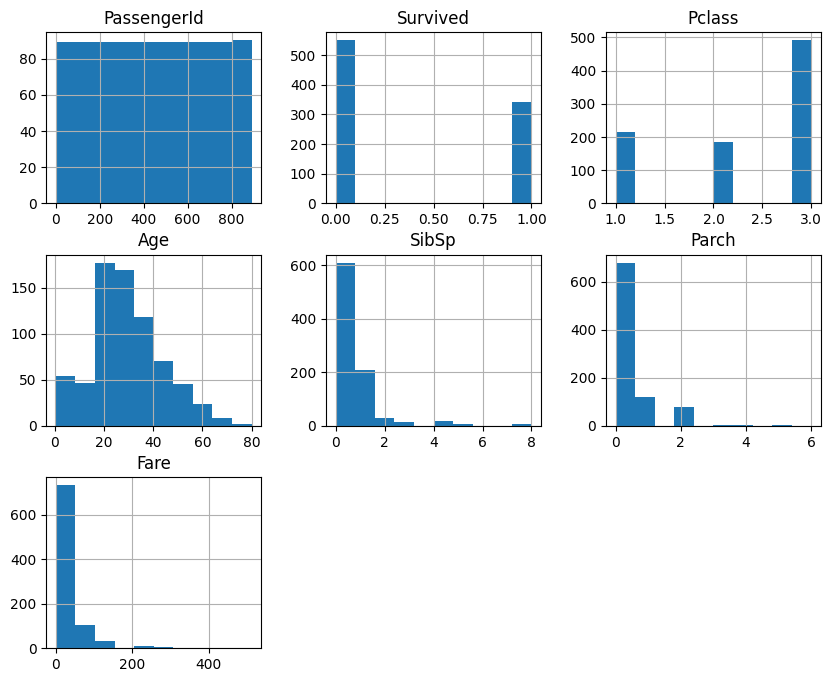

In [ ]:
train.hist(figsize=(10,8))

Quais grupos de pessoas tinha mais chance de sobrevivência?

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


<Axes: xlabel='Embarked', ylabel='Survived'>

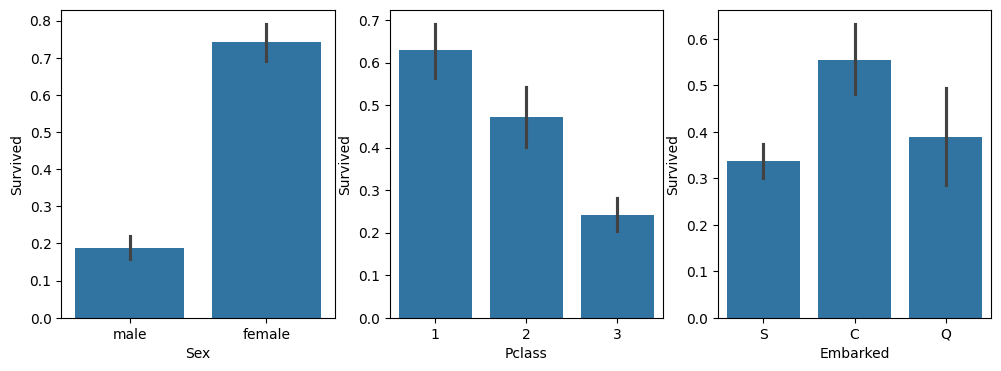

In [ ]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))
sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3)

Influencia da idade na probabilidade de sobrevivência

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


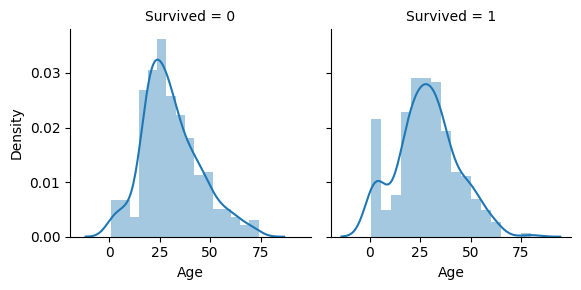

In [ ]:
# ver influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

array([[<Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Age', ylabel='Pclass'>,
        <Axes: xlabel='SibSp', ylabel='Pclass'>,
        <Axes: xlabel='Parch', ylabel='Pclass'>],
       [<Axes: xlabel='Pclass', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='SibSp', ylabel='Age'>,
        <Axes: xlabel='Parch', ylabel='Age'>],
       [<Axes: xlabel='Pclass', ylabel='SibSp'>,
        <Axes: xlabel='Age', ylabel='SibSp'>,
        <Axes: xlabel='SibSp', ylabel='SibSp'>,
        <Axes: xlabel='Parch', ylabel='SibSp'>],
       [<Axes: xlabel='Pclass', ylabel='Parch'>,
        <Axes: xlabel='Age', ylabel='Parch'>,
        <Axes: xlabel='SibSp', ylabel='Parch'>,
        <Axes: xlabel='Parch', ylabel='Parch'>]], dtype=object)

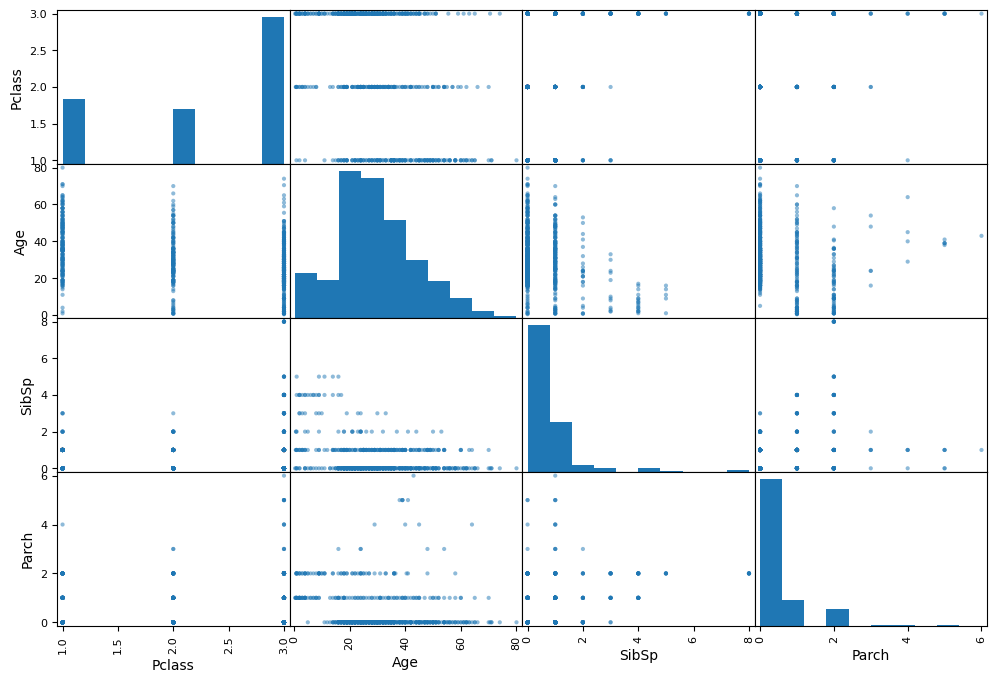

In [ ]:
Columns=['Pclass', 'Age', 'SibSp','Parch']
pd.plotting.scatter_matrix(train[Columns], figsize=(12,8))

In [ ]:
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
corr = train[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
display(corr)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


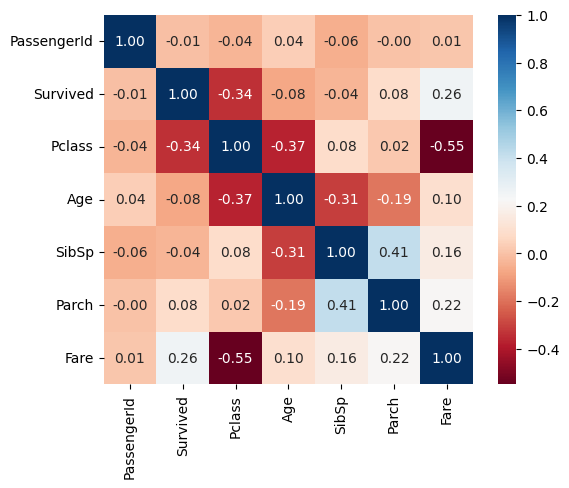

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f',square=True,linecolor='white',annot=True);

O método **describe** pode ser usado para colunas numéricas (uso mais comum) e para colunas não numéricas. Para utiliza-lo dessa forma é só passar o argumento **include=['O']**.

Atenção é uma letra O e não um número ZERO


In [ ]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


Olhando o output observamos que:

*   Havia mais homens do que mulheres.
*   Como já tinhamos visto antes existem alguns dados faltantes na coluna **Cabin**
*   O porto com mais embarques foi o Southampton.



## Preparação dos dados para o modelo

Até aqui, definimos o problema, obtivemos os dados e realizamos uma análise exploratória inicial onde olhamos de forma macro para os dados, entendemos os tipos de variáveis que temos no df_train, buscamos correlações com base nas variáveis selecionadas e entendemos como as variáveis categóricas estão distribuídas.

### Juntando os datasets de treino e teste

Uma ideia interessante para a preparação dos dados para um modelo de Machine Learning é juntar os datasets de treino e teste em um único DataFrame (df) e separar novamente no final.

Muitas vezes, é feito feature engineering, criação de variáveis dummy ou a codificação das variáveis.

In [ ]:
train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#Salvar os índices dos dasets para recuperar posteriormente
train_idx = train.shape[0]
test_idx = test.shape[0]

#Salvar PassengerId para envio ao Kaggle
passenger_id = test['PassengerId']

#extrair coluna 'Survived' e excluir ela do dataset treino
target = train['Survived'].copy()
train.drop(['Survived'], axis=1,inplace=True)

#concatenar treino e teste em um unico df
df_merge = pd.concat(objs=[train,test],axis=0).reset_index(drop=True)

print('df_merge.shape:({} x {})'.format(df_merge.shape[0],df_merge.shape[1]))

df_merge.shape:(1309 x 11)


### Selecionando as features (o que é features nesse caso?)

Aqui é o momento onde o cientista de dados define quais são as informações que de fato serão relevantes para o modelo.

In [ ]:
df_merge.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1, inplace=True)

### Valores faltantes

Vamos dar uma olhada nos valores que faltam em cada columna e tratar esses campos vazios.

Normalmente, há duas abordagens mais utilizadas quando encontramos valores ausentes (missing values):

*   Preencher esses valores arbitrariamente (média, mediana, valor mais frequente); e
*   Excluir a linha inteira.

In [ ]:
df_merge.isnull().sum()

,0
Pclass,0
Sex,0
Age,263
SibSp,0
Parch,0
Fare,1
Embarked,2


### Tratando os valores ausentes

Para as variáveis idade e tarifa, vamos colocar o valor da mediana, e para a variável do porto de embarque, vamos colocar o valor com maior frequência.

In [ ]:
age_median = df_merge['Age'].median()
df_merge['Age'].fillna(age_median, inplace=True)

fare_median = df_merge['Fare'].median()
df_merge['Fare'].fillna(fare_median, inplace=True)

embarked_top = df_merge['Embarked'].value_counts()[0]
df_merge['Embarked'].fillna(embarked_top, inplace=True)

/tmp/ipython-input-159204607.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge['Age'].fillna(age_median, inplace=True)
/tmp/ipython-input-159204607.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

### Preparação das variaveis para o modelo

O modelo matemático exige que trabalhemos com variáveis numéricas, ou seja, temos que transformar os dados de entrada que estão em formato categórico para números.

Vamos converter os valores possíveis de ``Sex`` para {'male': 0, 'female': 1}. Já em relação à variável Embarked, vamos aplicar o conceito de variáveis dummies.

As variáveis dummies (dummy variables) assumem aqui apenas valores 0 e 1, criando uma nova coluna para cada valor possível da variável categórica.

In [ ]:
df_merge['Sex'] = df_merge['Sex'].map({'male':0, 'female':1})

#dummies para Embarked
embarked_dummies = pd.get_dummies(df_merge['Embarked'], prefix='Embarked', dtype=int)
df_merge = pd.concat([df_merge, embarked_dummies], axis=1)
df_merge.drop('Embarked', axis=1, inplace=True)

display(df_merge.head(5))

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


### Recuperando os datasets de treino e teste

Finalizamos a preparação do dataset para o modelo e vamos dividir novamente entre treino e teste.

In [ ]:
train = df_merge.iloc[:train_idx]
test = df_merge.iloc[train_idx:]

# Construção do modelo e avaliação

 A etapa mais demorada de qualquer projeto de Data Science é a Análise Exploratória de Dados e a preparação/tratamento deles.

Todo cuidado que tivemos serviu para entender o problema, testar hipóteses e descartar dados desnecessários/redundantes.

Com poucas linhas de código a gente consegue criar e otimizar modelos de Machine Learning básicos. Aqui, vamos construir dois:

*   Modelo de Regressão Logística
*   Modelo de Árvore de Decisão

In [ ]:
# vamos importar as bibliotecas do modelo de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Criando o modelo de regressão logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# verificando a acurácia do modelo
acc_logRec = round(lr_model.score(train, target) * 100,2)
print('Acurácia do modelo de regressão logística é de: {}'.format(acc_logRec))

Acurácia do modelo de regressão logística é de: 80.13


Esse resultado está excelente para um primeiro modelo. Vou aproveitar e fazer a previsão sobre o dataset de teste para submeter ao Kaggle e comparar o desempenho.


In [ ]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passenger_id,
    "Survived": y_pred_lr
})

# gerar arquivo csv
submission.to_csv('./submission_lr.csv', index=False)

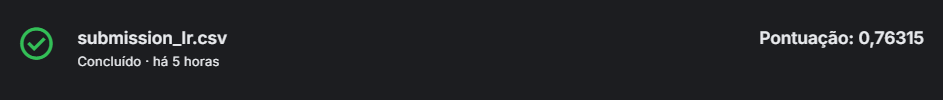

In [ ]:
# criar um modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# verificar a acurácia do modelo
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.72


In [ ]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passenger_id,
    "Survived": y_pred_tree
})

# gerar arquivo csv
submission.to_csv('./submission_tree.csv', index=False)

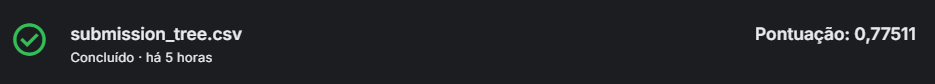

# Eu sobreviveria ao Titanic?

Já que o nosso modelo está pronto, vamos ver se eu e minha namorada sobreviveríamos ao naufrágio do Titanic.

Vou considerar que viajamos na primeira classe, tendo pago o preço médio do ticket e embarcamos no porto de Cherbourg (Normandia, França).


In [ ]:
# declarar os valores das variáveis para mim e minha esposa
Vitor_Prado = np.array([1, 0, 27, 1, 0, 53.1, 0, 1, 0, 0]).reshape((1, -1))
Izabela_Mantelli = np.array([1, 1, 31, 1, 0, 53.1, 0, 1, 0, 0]).reshape((1, -1))

# verificar se nós teríamos sobrevivido
print("Vitor_Prado:\t{}".format(tree_model.predict(Vitor_Prado)[0]))
print("Izabela_Mantelli:\t{}".format(tree_model.predict(Izabela_Mantelli)[0]))

Vitor_Prado:	0
Izabela_Mantelli:	1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


De acordo com o meu próprio modelo, mesmo eu viajando na primeira classe, eu não teria sobrevivido ao desastre do Titanic. Já minha namorada foi classificada como sobrevivente.

Espero que tenha aproveitado a leitura desse desafio rico em historia.